# 1. Word2Vec with ETCBC Data
## An Experiment

In [2]:
import collections
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib import pyplot
from tf.fabric import Fabric
%matplotlib inline

In [3]:
TF = Fabric(locations='~/github/etcbc/bhsa/tf', modules='c')

api = TF.load('''
                book chapter verse
                lex sp gloss domain
                freq_lex
              ''')

api.makeAvailableIn(globals())

This is Text-Fabric 3.2.2
Api reference : https://github.com/Dans-labs/text-fabric/wiki/Api
Tutorial      : https://github.com/Dans-labs/text-fabric/blob/master/docs/tutorial.ipynb
Example data  : https://github.com/Dans-labs/text-fabric-data

115 features found and 0 ignored
  0.00s loading features ...
   |     0.01s B book                 from /Users/cody/github/etcbc/bhsa/tf/c
   |     0.01s B chapter              from /Users/cody/github/etcbc/bhsa/tf/c
   |     0.01s B verse                from /Users/cody/github/etcbc/bhsa/tf/c
   |     0.11s B lex                  from /Users/cody/github/etcbc/bhsa/tf/c
   |     0.12s B sp                   from /Users/cody/github/etcbc/bhsa/tf/c
   |     0.01s B gloss                from /Users/cody/github/etcbc/bhsa/tf/c
   |     0.02s B domain               from /Users/cody/github/etcbc/bhsa/tf/c
   |     0.08s B freq_lex             from /Users/cody/github/etcbc/bhsa/tf/c
   |     0.00s Feature overview: 109 for nodes; 5 for edges; 1 configs

## ETCBC Data Gather

In [4]:
clauses = []

for w in F.otype.s('word'):
    
    if F.sp.v(w) != 'subs':
        continue
    
    if F.domain.v(L.u(w, otype='clause')[0]) != 'N':
        continue
    
    clause = L.u(w, otype='clause')[0]
    clause_w = [F.lex.v(word) for word in L.d(clause, otype='word')]
    
    clauses.append(clause_w)

In [5]:
def lex_lookup(lex):
    
    lex_node = [l for l in F.otype.s('lex') if F.lex.v(l) == lex]
    
    return lex_node[0]

## Build Model

Word2Vec(vocab=370, size=100, alpha=0.025)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


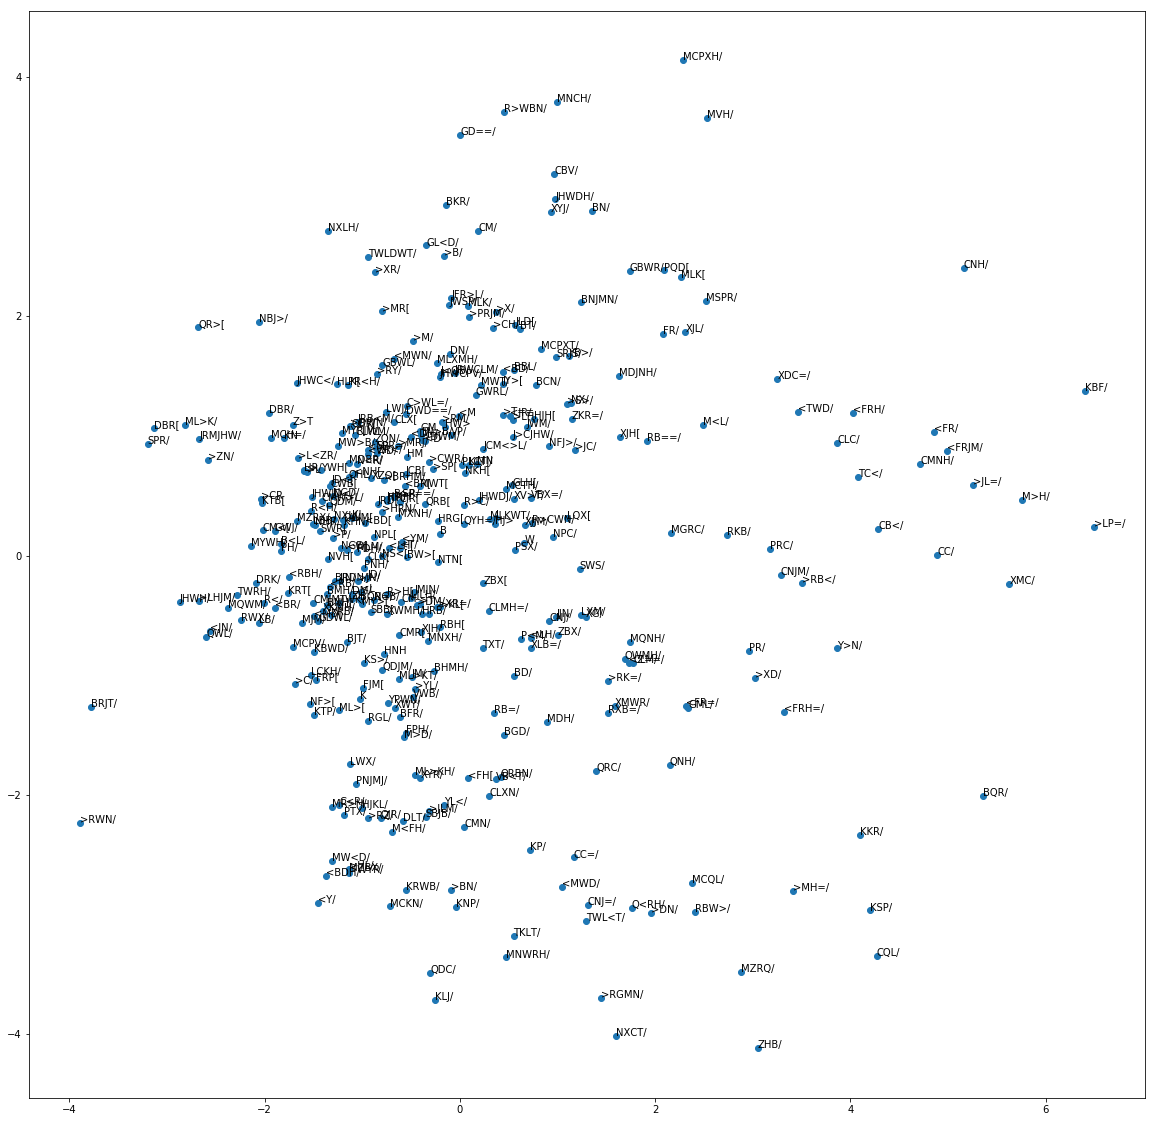

In [6]:
# train model
model = Word2Vec(clauses, min_count=100, seed=5)

# summarize the loaded model
print(model)

# summarize vocabulary
words = list(model.wv.vocab)

# access vector for one word
# print(model['sentence'])

# compress down to two dimensions with PCA
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.figure(1, figsize=(20, 20))

pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)

for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

#pyplot.show()

In [32]:
# compress down to two dimensions with PCA
model.wv[model.wv.vocab][0]

array([-3.71257573e-01, -1.68342099e-01, -5.27466118e-01, -1.19574174e-01,
       -3.34118545e-01, -4.27783817e-01, -7.92843461e-01,  4.73206311e-01,
       -6.07306808e-02, -2.30253413e-01,  3.68020117e-01,  2.16366246e-01,
       -1.41975522e-01, -1.79345235e-01, -7.02552423e-02,  6.85394824e-01,
       -1.46120816e-01,  5.13908640e-02,  1.74406052e-01,  6.06803000e-01,
        2.97298342e-01, -1.50711045e-01,  1.79586798e-01, -2.93289781e-01,
        4.53166431e-03,  3.97521079e-01,  1.50332406e-01, -1.95430189e-01,
        2.07503468e-01,  2.56229252e-01,  1.62146330e-01,  1.30360916e-01,
        1.29363433e-01, -2.49099344e-01,  5.33745810e-03, -2.43076563e-01,
       -9.84430090e-02,  1.80893932e-02, -2.20806953e-02, -6.70252293e-02,
        2.69178003e-01, -1.51144758e-01,  5.24786532e-01,  6.07975602e-01,
       -2.14223906e-01,  2.95308411e-01, -1.12917759e-01, -2.61718233e-05,
        6.01403937e-02, -7.52854586e-01, -5.85526586e-01, -1.23771615e-01,
        1.13013908e-01,  

In [33]:
len(words)

370

## Interesting Examples

In [11]:
model = model.wv

In [12]:
model.most_similar('BQR=/') # morning

[('<RB/', 0.9044942259788513),
 ('LJLH/', 0.7818545699119568),
 ('YPWN/', 0.7470758557319641),
 ('MJM/', 0.7189121246337891),
 ('<T/', 0.7178544402122498),
 ('BMH/', 0.7172350287437439),
 ('B>R/', 0.6978979706764221),
 ('NGB/', 0.6827888488769531),
 ('ZH', 0.6787104606628418),
 ('MCKN/', 0.6762585639953613)]

In [13]:
model.most_similar('TWRH/') # Torah

[('SPR/', 0.8987403512001038),
 ('MYWH/', 0.8861343264579773),
 ('MCPV/', 0.841533899307251),
 ('CMW>L/', 0.8284556269645691),
 ('KTB[', 0.8238480091094971),
 ('LB/', 0.8002912402153015),
 ('LBB/', 0.8000668287277222),
 ('R</', 0.789839506149292),
 ('R<H/', 0.7655617594718933),
 ('>ZN/', 0.7330760359764099)]

In [14]:
model.most_similar('JHWH/') # Yahweh

[('>LHJM/', 0.6996092200279236),
 ('MYWH/', 0.6206423044204712),
 ('TWRH/', 0.6167588233947754),
 ('BRJT/', 0.6015863418579102),
 ('DBR[', 0.5961471796035767),
 ('CMW>L/', 0.5915499925613403),
 ('RWX/', 0.5778903961181641),
 ('XKMH/', 0.5739405751228333),
 ('LB/', 0.5681934952735901),
 ('MCPV/', 0.5650140643119812)]

In [15]:
model.most_similar('MLXMH/') # war

[('CLWM/', 0.7782018184661865),
 ('MXNH/', 0.7368483543395996),
 ('<M', 0.6855702996253967),
 ('<WD/', 0.6716827750205994),
 ('>SP[', 0.6040995717048645),
 ('GBWR/', 0.5913050770759583),
 ('>RM/', 0.5908200144767761),
 ('JW>B/', 0.5446526408195496),
 ('<BR[', 0.5312507152557373),
 ('C>WL=/', 0.5196933746337891)]

In [16]:
model.most_similar('MLK/') # king, this one returns a list of kings!

[('JHWCPV/', 0.6036867499351501),
 ('<BD/', 0.5991636514663696),
 ('>MRJ/', 0.5682408213615417),
 ('BBL/', 0.5673744082450867),
 ('>CWR/', 0.5630196928977966),
 ('JRWCLM/', 0.5456891655921936),
 ('GLH[', 0.5323491096496582),
 ('CLX[', 0.5055988430976868),
 ('RB==/', 0.5048257112503052),
 ('SRJS/', 0.5024957656860352)]

In [17]:
model.most_similar('LXM/') # bread

[('JJN/', 0.7646477222442627),
 ('>XD/', 0.7112557291984558),
 ('<Z==/', 0.6944336295127869),
 ('>KL[', 0.6480523347854614),
 ('Q<RH/', 0.6357281804084778),
 ('QRBN/', 0.6185397505760193),
 ('PR/', 0.580172061920166),
 ('XMWR/', 0.5749346613883972),
 ('MZRQ/', 0.5710407495498657),
 ('RB=/', 0.5637235045433044)]

In [18]:
model.most_similar('BJT/') # house

[('ML>KT/', 0.7158870697021484),
 ('>WYR/', 0.6827923059463501),
 ('XYR/', 0.6733881831169128),
 ('LCKH/', 0.6595339179039001),
 ('QDC/', 0.6544222235679626),
 ('HJKL/', 0.6184317469596863),
 ('PNJMJ/', 0.5998733043670654),
 ('<BDH/', 0.5832963585853577),
 ('TWLDWT/', 0.5298770666122437),
 ('CJR[', 0.525915801525116)]

## Distinguishing Unlike Things

Man in a list of animals...

In [19]:
model.doesnt_match(['BQR/', 'BHMH/', '<Z==/', '>DM/'])

'>DM/'

## Attempting to ID Hypernyms

In [20]:
most_similar = dict((noun, model.most_similar(noun)[0][0]) 
                        for noun in model.vocab
                        if F.sp.v(lex_lookup(noun)) == 'subs'
                   )

cross_over = collections.defaultdict(list)

for lex, match in most_similar.items():
    
    for lex_comp, match_comp in most_similar.items():
        
        if lex_comp == lex:
            continue
            
        elif match == match_comp:   
            cross_over[lex].append(lex_comp)
            
len(cross_over)

139

In [21]:
cross_over.keys()

dict_keys(['>LHJM/', 'LJLH/', 'BQR=/', 'MJM/', 'CMJM/', 'JM/', '<Y/', 'ZR</', 'CNJM/', 'KNP/', 'XJH/', '>DM/', 'ML>KT/', '>P/', 'XJJM/', 'QDM/', 'CM/', 'NGD/', 'YL</', '<JN/', '>JC/', 'QWL/', 'KRWB/', 'Y>N/', 'XLB=/', 'MQNH/', 'CLC/', 'CMNH/', 'BT/', 'TC</', 'XMC/', '<FRH/', 'CC/', 'GBWR/', '<WLM/', 'R<H/', 'LB/', 'XDC=/', 'HR/', '>MH=/', 'M<L/', 'R>C/', 'KP/', 'JD/', '<FRJM/', 'JJN/', 'GBWL/', 'FPH/', 'DBR/', '>BN/', 'NGB/', 'FR/', 'PR<H/', 'BJT/', 'BQR/', 'XMWR/', '<BD/', 'GML/', 'KSP/', 'KKR/', 'MDBR/', 'B>R/', 'KHN/', 'PTX/', 'N<R/', 'C<R/', 'DLT/', '>JL=/', 'CQL/', 'SBJB/', '<FRH=/', 'MCQL/', 'BGD/', 'XYR/', 'MYWH/', 'TWRH/', 'NXL/', 'CLWM/', '<Z==/', 'P<M/', 'CMN/', '<TWD/', 'LBB/', 'ZBX/', 'PR/', 'XJL/', 'VP/', 'SRJS/', 'VBX=/', '>YL/', 'QDJM/', 'CC=/', 'MSPR/', 'SWS/', 'CBV/', 'RKB/', '<BR/', '>RWN/', '<BDH/', 'MVH/', 'XYJ/', '<MWD/', 'XWMH/', 'MCPV/', 'KBWD/', 'SPR/', 'M<FH/', 'XKMH/', 'ML>KH/', 'LWX/', 'QDC/', 'TWL<T/', '>RK=/', 'RXB=/', 'QRC/', 'YPWN/', 'QWMH/', 'CLXN/', 'Q<

In [22]:
cross_over['MSPR/']

['CM/', 'M<L/']

In [23]:
model.most_similar('CM/')

[('ZKR=/', 0.7510161995887756),
 ('MSPR/', 0.7172887325286865),
 ('TWLDWT/', 0.7063162326812744),
 ('MCPXH/', 0.6684824824333191),
 ('M<L/', 0.6062027812004089),
 ('DN/', 0.5988186597824097),
 ('JLD[', 0.5502150058746338),
 ('BKR/', 0.5178437232971191),
 ('>B/', 0.514811635017395),
 ('KN', 0.5014941096305847)]

In [24]:
model.most_similar('MSPR/')

[('ZKR=/', 0.902475118637085),
 ('<FRJM/', 0.7499448657035828),
 ('MCPXH/', 0.7322486042976379),
 ('M<L/', 0.7236086130142212),
 ('CM/', 0.7172887325286865),
 ('TWLDWT/', 0.6448470950126648),
 ('CNH/', 0.628759503364563),
 ('<FRH/', 0.6130540370941162),
 ('CLC/', 0.6039057970046997),
 ('PQD[', 0.590221107006073)]

In [25]:
model.most_similar('M<L/')

[('ZKR=/', 0.8416011333465576),
 ('<FRJM/', 0.7694000601768494),
 ('MSPR/', 0.7236086130142212),
 ('CNH/', 0.6661323308944702),
 ('JY>[', 0.6443203687667847),
 ('XJJM/', 0.6083216667175293),
 ('CM/', 0.6062027812004089),
 ('MLK[', 0.5957083106040955),
 ('MLKWT/', 0.5890304446220398),
 ('<FRH/', 0.5831695199012756)]

In [26]:
model.most_similar('ZKR=/')

[('MSPR/', 0.902475118637085),
 ('M<L/', 0.8416011333465576),
 ('CM/', 0.7510161995887756),
 ('<FRJM/', 0.7488783597946167),
 ('MCPXH/', 0.6906248927116394),
 ('DN/', 0.6598483324050903),
 ('>S>/', 0.6507393717765808),
 ('CNH/', 0.6486395001411438),
 ('XJJM/', 0.6129004955291748),
 ('<FRH/', 0.6128810048103333)]

In [27]:
F.gloss.v(lex_lookup('>RWN/'))

'ark'

In [28]:
model.similarity('ZKR=/', 'MSPR/')

0.90247511758419496

## Hierarchical Clustering

In [35]:
def hierarchical_clustering1(distanceMatrix, method, books):
    
    '''
    function written by Etienne van de Bijl
    '''
    
    Z = linkage(distanceMatrix,  method)
    pyplot.figure(figsize=(25, 25))
    dendrogram(Z, labels = books, orientation='right')
    pyplot.savefig('images/word_clusters', dpi=500)
    pyplot.show()

In [36]:
nouns = [n for n in model.vocab
            if F.sp.v(lex_lookup(n)) == 'subs'
        ]

dist = pd.DataFrame(np.zeros( (len(nouns), len(nouns))
                           )
                   )

for i, nounA in enumerate(nouns):
    for j, nounB in enumerate(nouns):
        distance = round(model.distance(nounA, nounB), 6)
        dist.iloc[i, j] = distance
        
dist.columns = nouns
dist.index = nouns

In [37]:
dist.head()

,>LHJM/,BJN/,JWM/,LJLH/,<RB/,BQR=/,>XD/,MJM/,TXT/,CMJM/,...,BMH/,LCKH/,>RZ/,SPR=/,MLKWT/,>JLM/,XG/,MDJNH/,RB==/,RBW>/
>LHJM/,0.000000,0.842924,0.902989,0.877117,0.787176,0.734673,1.331942,0.909135,1.162502,0.797563,...,0.642872,0.560222,0.748620,0.802171,1.113504,0.857966,0.975559,1.248583,1.203913,1.073248
BJN/,0.842924,0.000000,1.107378,0.776861,0.654099,0.774703,1.258820,0.597911,0.871849,0.611693,...,0.762541,0.542339,0.791237,0.996024,0.965137,0.580473,1.043866,1.225735,1.246125,1.065221
JWM/,0.902989,1.107378,-0.000000,0.309284,0.514942,0.459160,0.800347,0.809073,1.035085,1.026638,...,0.880135,1.062356,0.936522,1.251648,0.441422,0.943389,0.290921,0.809110,1.101564,1.044311
LJLH/,0.877117,0.776861,0.309284,0.000000,0.213736,0.218145,0.969838,0.413034,0.935192,0.861223,...,0.603341,0.770032,0.610585,1.381866,0.444814,0.633503,0.377906,1.145970,1.255561,1.168903
<RB/,0.787176,0.654099,0.514942,0.213736,0.000000,0.095506,0.943309,0.237171,0.780682,0.569507,...,0.407208,0.609987,0.462393,1.303283,0.430912,0.511253,0.450118,1.350440,1.449280,1.278740


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  import sys


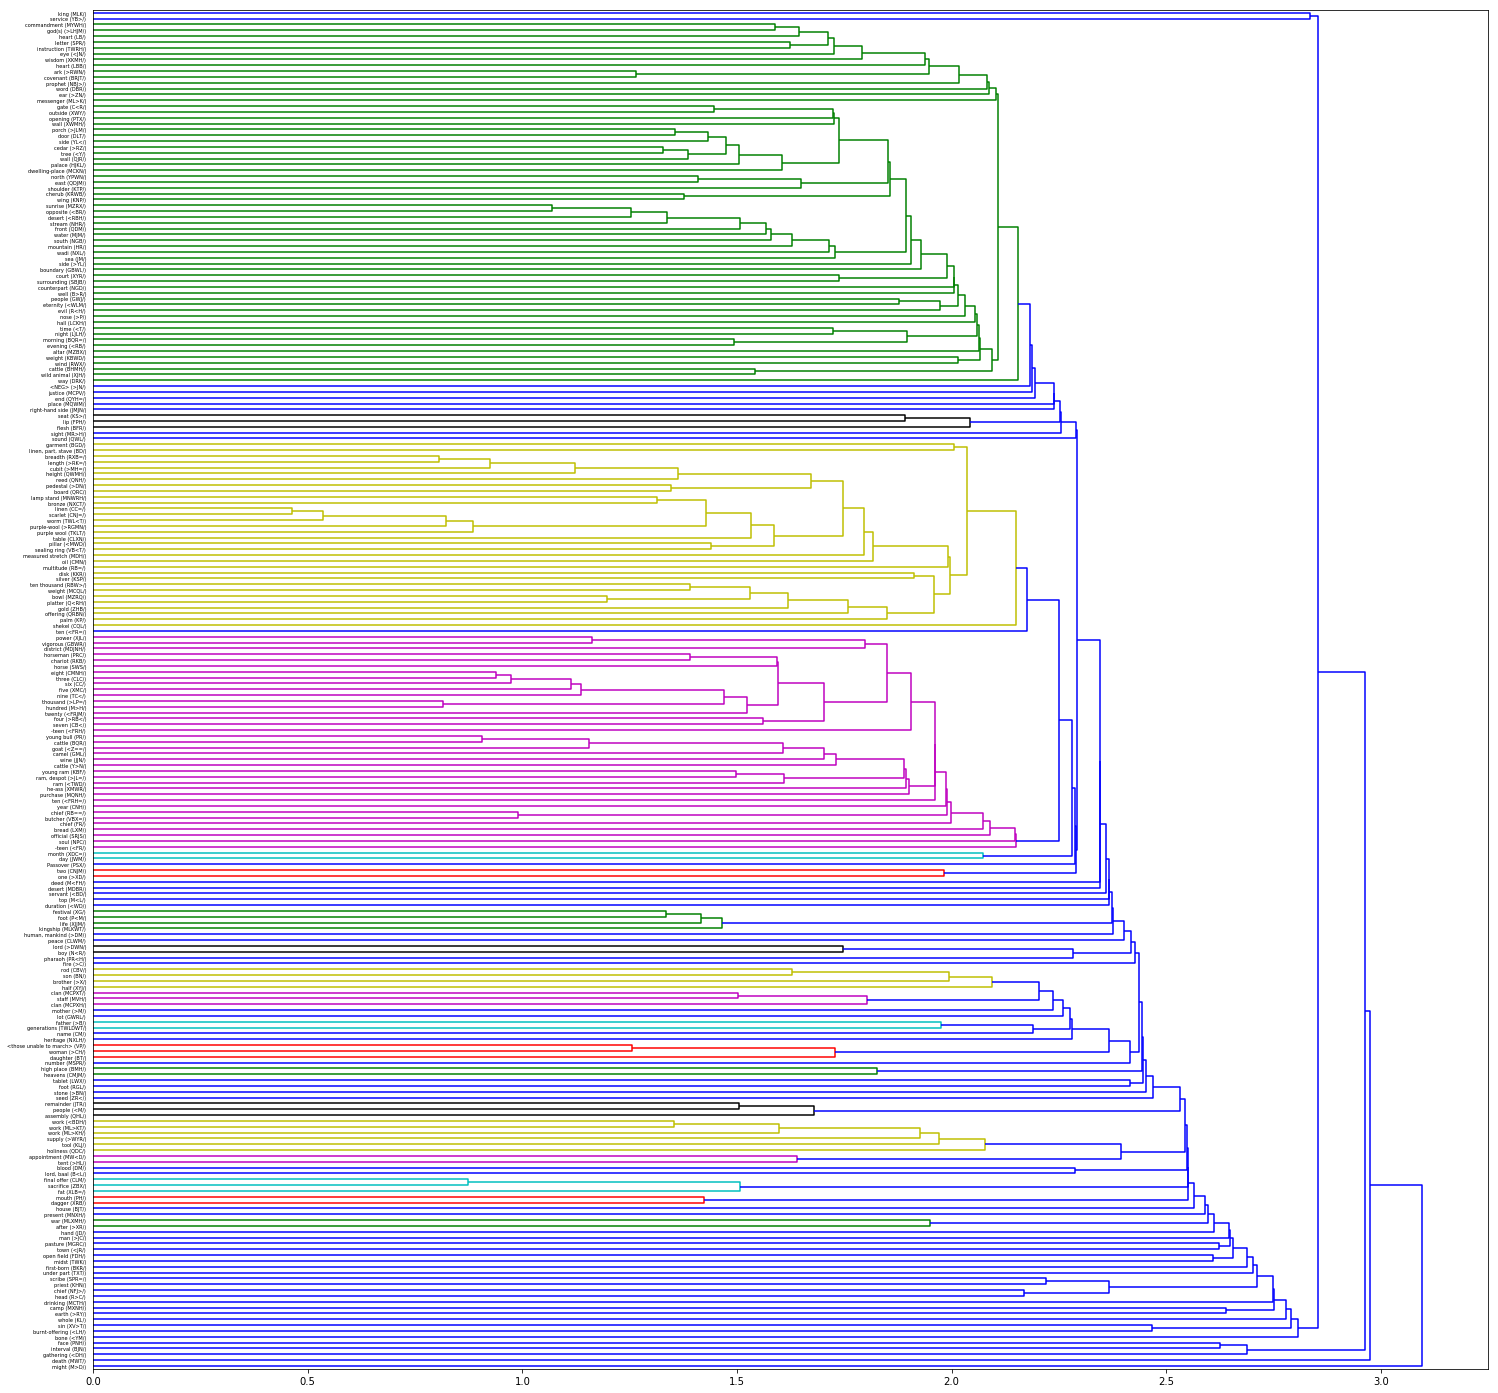

In [41]:
hierarchical_clustering1(np.matrix(dist.values), 'single', ['{} ({})'.format(F.gloss.v(lex_lookup(n)), n) for n in nouns])